**Importación de librerías necesarias**


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn import datasets, metrics



**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bikes.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000
725,2012-12-28,5.545775,54.242931,14.792709,644.000000
726,2012-12-29,4.924888,54.010283,14.777848,575.666667
727,2012-12-30,4.304001,53.777635,14.762987,507.333333


Tipos de datos del df

In [ ]:
df.dtypes

date            object
temperature    float64
humidity       float64
windspeed      float64
count          float64
dtype: object

Conversion de date(object) a date

In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.dtypes

date           datetime64[ns]
temperature           float64
humidity              float64
windspeed             float64
count                 float64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,temperature,humidity,windspeed,count
count,729.000000,729.000000,729.000000,729.000000
mean,17.762024,56.514591,17.241418,622.818930
std,8.921313,7.348730,5.222353,383.958772
min,-2.200000,21.300000,5.300000,2.000000
25%,10.066578,51.561669,13.462096,256.333333
50%,18.087694,56.546144,16.656522,639.000000
75%,25.455587,61.423987,20.320807,891.666667
max,35.100000,75.600000,35.200000,1820.000000


Mostrar un mapa de calor que indique la correlación entre vriables

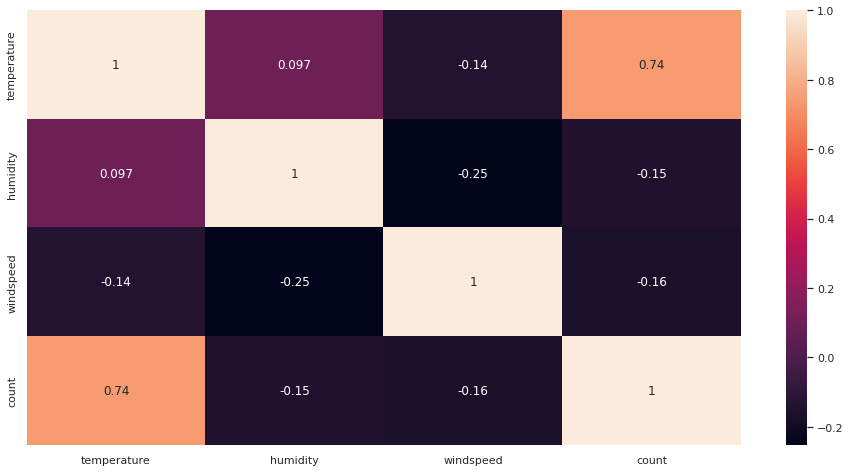

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

In [ ]:
df_filtrado  = pd.DataFrame()
df_filtrado = df[['temperature','humidity','windspeed','count']].copy()
                  
df_filtrado
# df_filtrado.plot()

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.000000
1,2.896673,54.267219,15.136882,108.000000
2,4.235654,45.697702,17.034578,82.000000
3,3.112643,50.237349,10.091568,88.000000
4,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...
724,5.587201,57.755931,28.678187,247.000000
725,5.545775,54.242931,14.792709,644.000000
726,4.924888,54.010283,14.777848,575.666667
727,4.304001,53.777635,14.762987,507.333333


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
# x_bike = df_filtrado.drop('count',axis = 1)
# y_bike = df_filtrado['count']



Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x_bike,y_bike,
#                                                  train_size = 0.75,
#                                                  test_size = 0.25
#                                                  )


train_bike = df_filtrado.iloc[:501]
test_bike = df_filtrado.iloc[502:]

# train
x_train = train_bike[['temperature','humidity','windspeed']]
y_train = train_bike['count']

# test
x_test = test_bike[['temperature','humidity','windspeed']]
y_test = test_bike['count']

**Entrenamiento y predicción**


Elegir, instanciar y entrenar el modelo

In [ ]:
# con KNeighborsRegressor
# parametros
k = 10
w = 'distance'

# elegimos clasificador

# instanciamos el modelo
model = KNeighborsRegressor(k,weights=w)

# entrenamiento
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_model = model.predict(x_test)

In [ ]:
y_model

**Evaluación**

In [ ]:
# evaluacion
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_model,y_test)
print(f"error cuadrático medio: {mean_squared_error}")


from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_model,y_test)
print(f"error absoluto medio: {mean_absolute_error}")




error cuadrático medio: 95079.71379124143
error absoluto medio: 246.3994807607776


Representar gráficamente los valores predichos con los valores reales

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


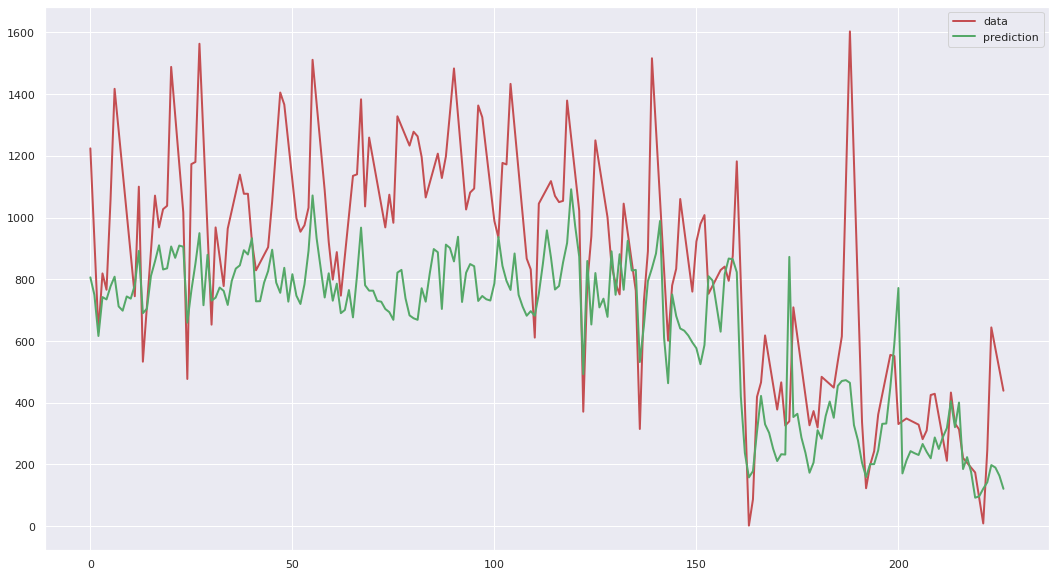

In [ ]:
import numpy as np

 

y_pred = y_model

xx = np.stack(i for i in range(y_test.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(xx, y_test, c='r', LineWidth = 2, label = 'data')
plt.plot(xx, y_pred, c='g', LineWidth = 2, label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello
realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k
desde 1 a 30.

In [ ]:
from pandas.core.dtypes.inference import is_file_like
# con KNeighborsRegressor

# parametros
# k = 3
# w = 'uniform'

valores_w = ['uniform','distance']
errores_absoluto = []
k_min = 0
w_min = ""

for w in valores_w:
  for k in range(1,31):
    # instanciamos el modelo
    model = KNeighborsRegressor(k,weights=w)

    # entrenamiento
    model.fit(x_train,y_train)

    # Mostrar la predicción realizada (imprimir la variable con la predicción)
    # y_model
    # print(y_model)

    y_model = model.predict(x_test)

    from sklearn.metrics import mean_absolute_error
    mean_absolute_error = mean_absolute_error(y_model,y_test)

    errores_absoluto.append(mean_absolute_error)

    if min(errores_absoluto) == mean_absolute_error:
      k_min = k
      w_min = w

    from sklearn.metrics import mean_absolute_error
    print(f"mean_absolute_error: {mean_absolute_error(y_test,y_model)} con k como: {k} y con w como: {w}")
  


mean_absolute_error: 294.5734214390602 con k como: 1 y con w como: uniform
mean_absolute_error: 264.76468428781203 con k como: 2 y con w como: uniform
mean_absolute_error: 255.53401860009788 con k como: 3 y con w como: uniform
mean_absolute_error: 254.9124449339207 con k como: 4 y con w como: uniform
mean_absolute_error: 251.98568281938327 con k como: 5 y con w como: uniform
mean_absolute_error: 250.09348996573672 con k como: 6 y con w como: uniform
mean_absolute_error: 246.00005244388507 con k como: 7 y con w como: uniform
mean_absolute_error: 248.98738069016153 con k como: 8 y con w como: uniform
mean_absolute_error: 249.65181922010117 con k como: 9 y con w como: uniform
mean_absolute_error: 249.73839941262844 con k como: 10 y con w como: uniform
mean_absolute_error: 248.80670137498333 con k como: 11 y con w como: uniform
mean_absolute_error: 247.4104870288791 con k como: 12 y con w como: uniform
mean_absolute_error: 246.65443917316162 con k como: 13 y con w como: uniform
mean_absolu

In [ ]:
print(f"El valor min de error absoluto es:{min(errores_absoluto)}, con k={k_min}, y w={w_min}")

El valor min de error absoluto es:243.08643326097726, con k=30, y w=distance


Usando los mejores parametros

In [ ]:
# con KNeighborsRegressor
# parametros
k = k_min
w = w_min

# elegimos clasificador

# instanciamos el modelo
model = KNeighborsRegressor(k,weights=w)

# entrenamiento
model.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=30, weights='distance')

In [ ]:
# prediccion
y_model = model.predict(x_test)

In [ ]:
# evaluacion
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_model,y_test)
print(f"error cuadrático medio: {mean_squared_error}")


from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_model,y_test)
print(f"error absoluto medio: {mean_absolute_error}")


error cuadrático medio: 93448.6923392162
error absoluto medio: 243.08643326097726


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


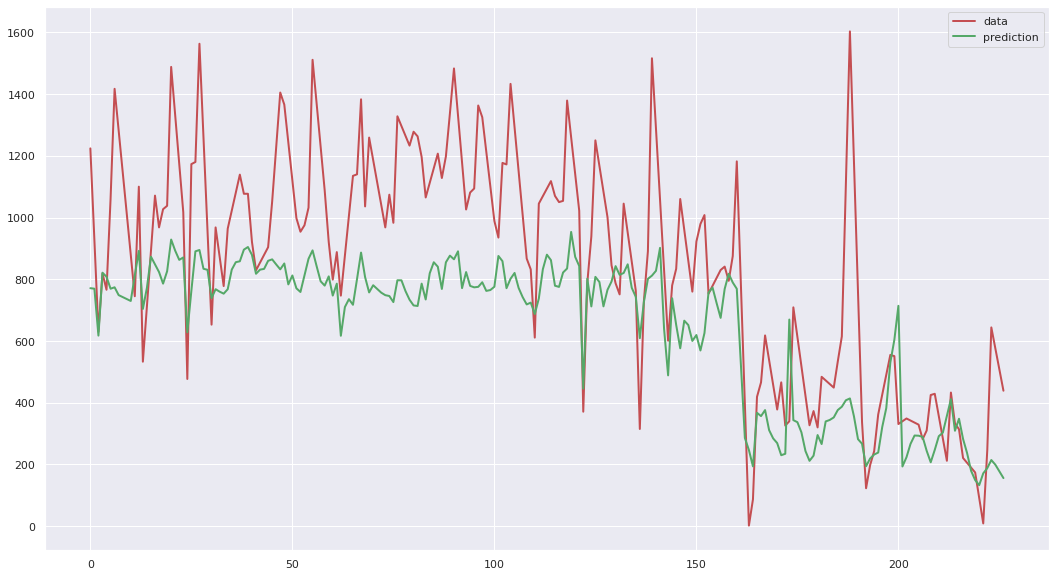

In [ ]:
y_pred = y_model

xx = np.stack(i for i in range(y_test.shape[0]))
plt.figure(figsize=(18,10))
plt.plot(xx, y_test, c='r', LineWidth = 2, label = 'data')
plt.plot(xx, y_pred, c='g', LineWidth = 2, label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()